# **Predicting Term Deposit Subscriptions Using Bank Marketing Data**

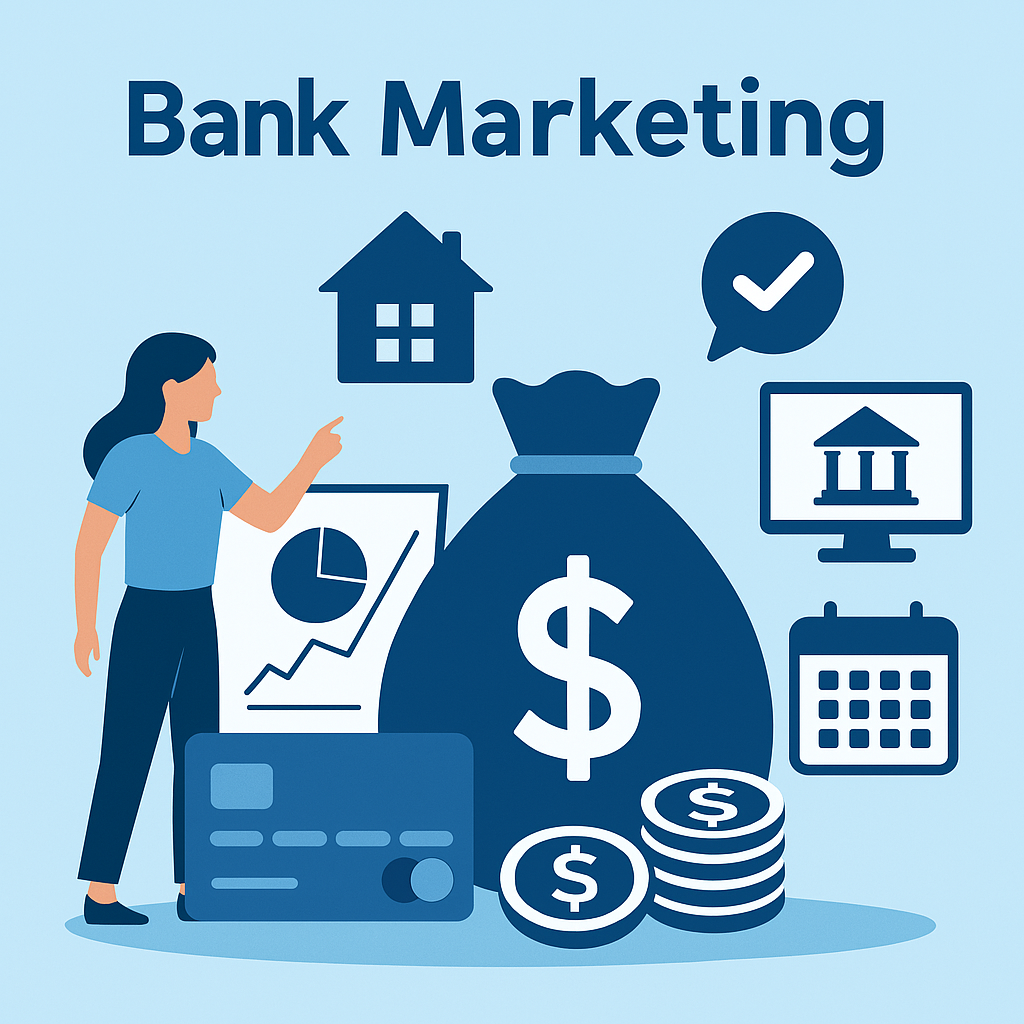

In [5]:
Image(filename='bmpi.png')

# Table of Contents :

1. Introduction
2. Goal Of the Project
3. Data Story
4. Data Preprocessing

# **1. Introduction**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

# **2. Goal of the Project**

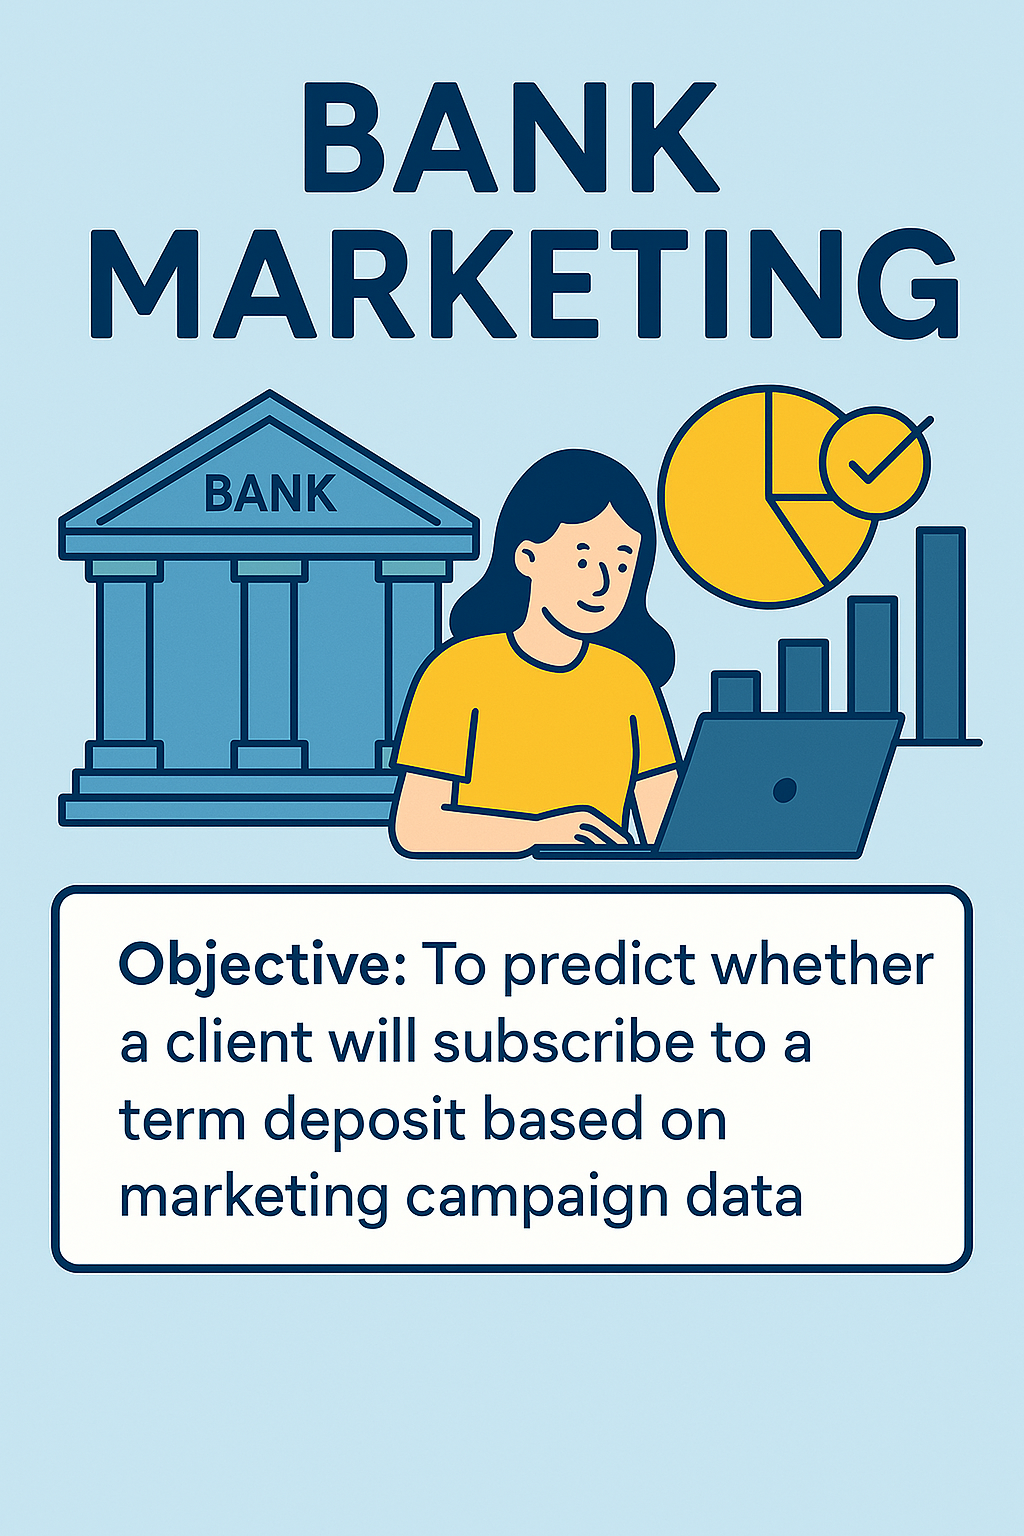

In [9]:
Image(filename='bmpi2.png', width=500)

# **3. Data Story/Source**

About dataset

Source of the data is from   UC Irvine Machine Learning Repository.

Link : https://archive.ics.uci.edu/dataset/222/bank+marketing



**Dataset Description**

 Bank-additional-full.csv consists of 20 columns & 41188 rows

# **Features/columns:**
The dataset contains client and campaign-related features such as age, job type, marital status, account balance, and contact details. It aims to predict whether a client will subscribe to a term deposit (y).

**TOOLS USED**

Libraries:

    pandas – For data loading, preprocessing, and manipulation.
    
    numpy – For numerical operations and array handling.
    
    matplotlib.pyplot – For creating basic plots and visualizations.
    
    seaborn – For statistical data visualizations like boxplots, heatmaps, etc.
    
    sklearn (scikit-learn) – For machine learning models and preprocessing (feature selection, train-test split, SMOTE).
    
    imblearn (SMOTE) – For handling class imbalance using Synthetic Minority Over-sampling Technique.

Methods / Functions:

    pd.read_csv() – Loads data from a CSV file.
    
    df.select_dtypes() – Selects columns based on data types.
    
    train_test_split() – Splits data into training and testing sets.
    
    SelectKBest() – Selects top features based on statistical scores.
    
    f_classif – ANOVA F-value for feature selection with classification.
    
    drop() – Removes unwanted columns.
    
    sns.boxplot() / sns.countplot() / sns.heatmap() / sns.pairplot() – Various plots for EDA.
    
    SMOTE().fit_resample() – Balances the dataset by generating synthetic samples for minority class.



# **Data Preprocessing**

**1.Importing Libraries**

In [3]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE

In [180]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

**2. Load the dataset**

In [8]:
file_path = "bank-additional-full.csv"
df = pd.read_csv("bank-additional-full.csv", sep=";")
df

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

**3.Understand the data structure**

In [10]:
df.head

<bound method NDFrame.head of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mont

In [11]:
df.shape

(41188, 21)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [13]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [14]:
df.describe(include='object')

job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548

In [15]:
print(df['default'].value_counts(normalize=True))

default
no         0.791201
unknown    0.208726
yes        0.000073
Name: proportion, dtype: float64


In [16]:
# Dropping the unnecessary columns
df = df.drop(columns=['default', 'duration'])

Default tells you how many people said "yes", "no", or "unknown" for having a credit default. If almost all values are "no" or "unknown", then the column isn’t useful (low variance).
Duration is the duration of the call, which you only know after the outcome (y) happens. It gives high accuracy but makes the model unrealistic.

In [18]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

**4.Handle Missing Data**

In [20]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


After checking the missing values in the dataframe, it shows there are no missing values.

**5.Handle Duplicates**

In [23]:
df.duplicated().sum()

1997

In [24]:
df.drop_duplicates(inplace=True)

**Box Plot for Visualizing the Distribution of Numeric Features**

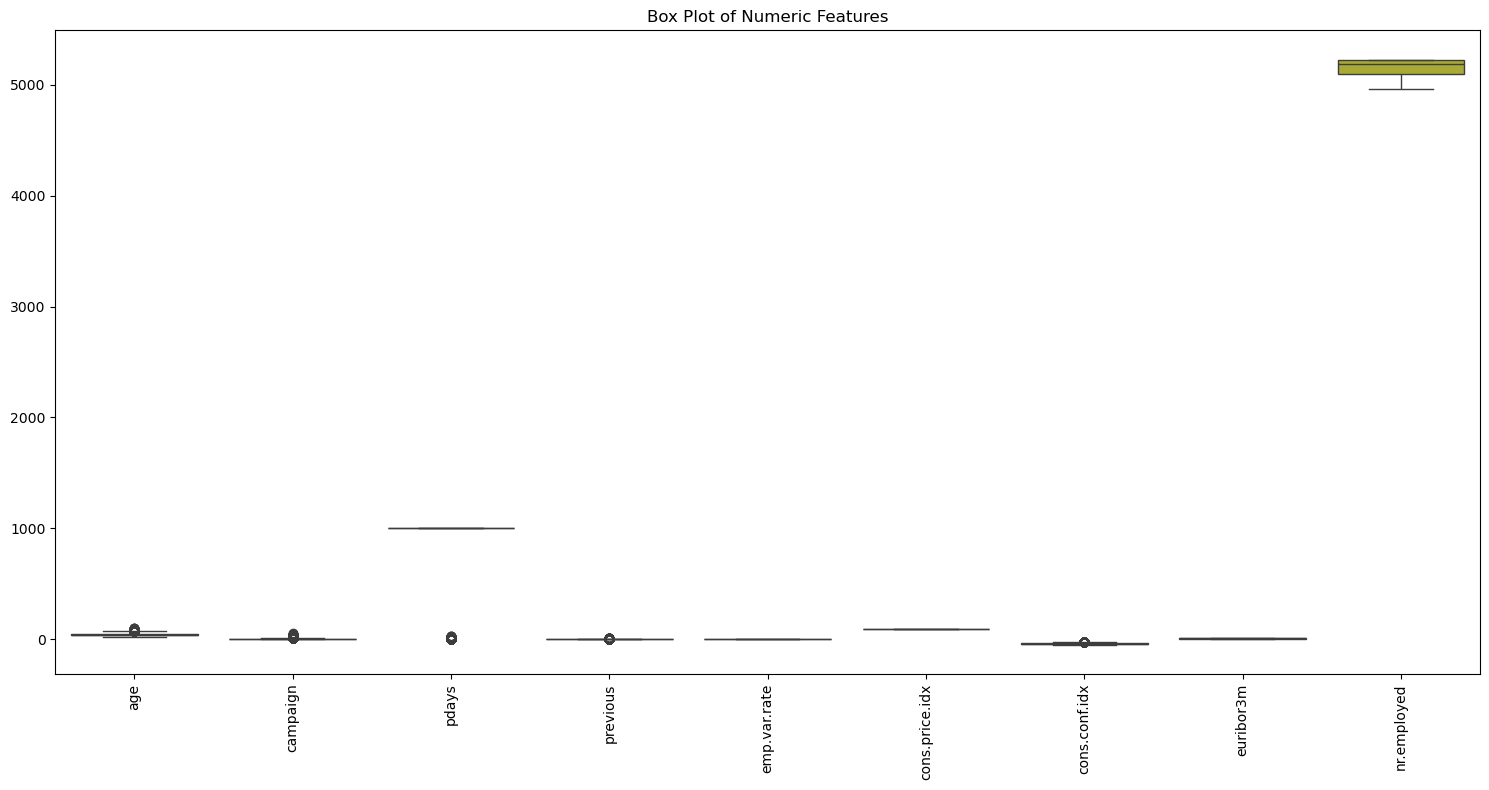

In [26]:
# Box Plot
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 8))
sns.boxplot(df)
plt.title("Box Plot of Numeric Features")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Box plot displaying the distribution and potential outliers of numeric features in the dataset.

**Univariate Analysis (Single Variable)**

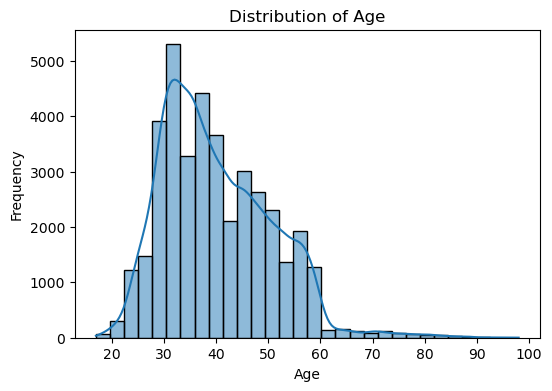

In [29]:
# Histogram of Age
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Helps to see the distribution of customers by age—whether it's normal, skewed, or has outliers.

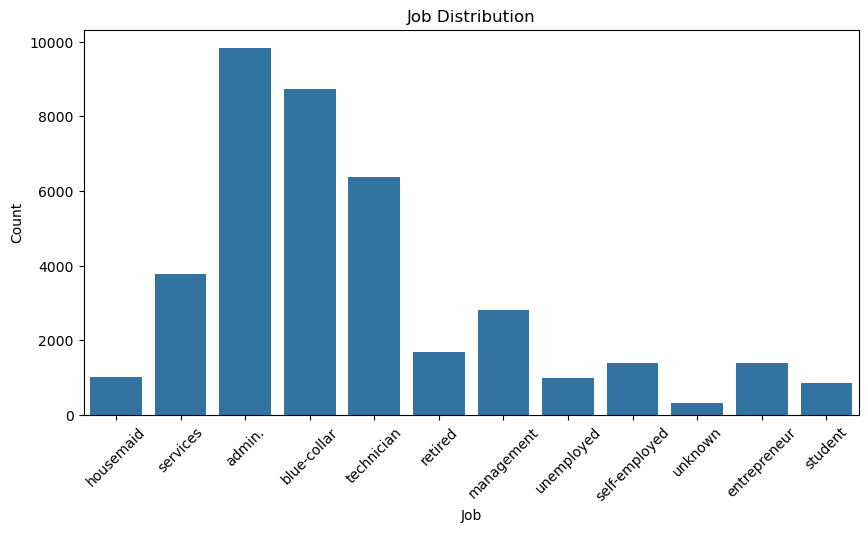

In [31]:
# Countplot of Job
plt.figure(figsize=(10,5))
sns.countplot(x='job', data=df)
plt.xticks(rotation=45)
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()

Shows how many customers fall under each job category.

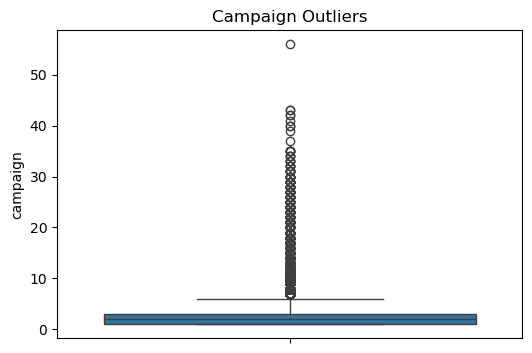

In [33]:
# Boxplot for Campaign
plt.figure(figsize=(6,4))
sns.boxplot(y='campaign', data=df)
plt.title('Campaign Outliers')
plt.show()

Identifies outliers in the number of contacts performed during the campaign.

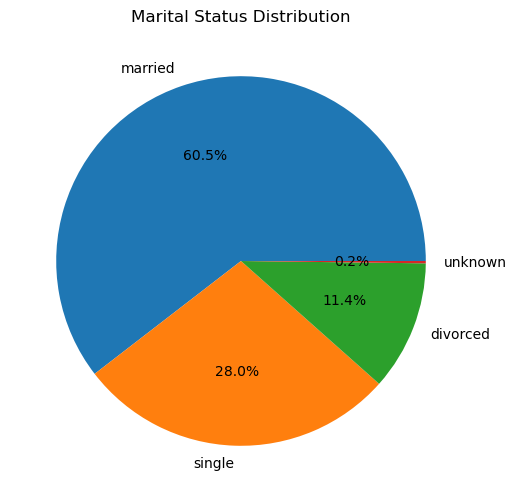

In [37]:
# Pie Chart for Marital Status
df['marital'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title('Marital Status Distribution')
plt.ylabel('')
plt.show()

Shows proportion of customers in each marital status group.

**Bivariate Analysis (Relationship Between Two Variables)**

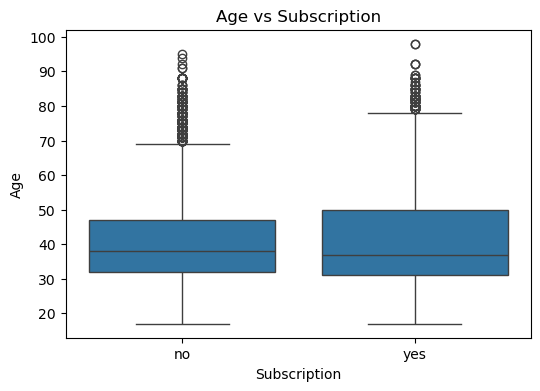

In [40]:
# Box Plot of Age vs Subscription
plt.figure(figsize=(6,4))
sns.boxplot(x='y', y='age', data=df)
plt.title('Age vs Subscription')
plt.xlabel('Subscription')
plt.ylabel('Age')
plt.show()

Helps understand how age varies between subscribed and non-subscribed groups.

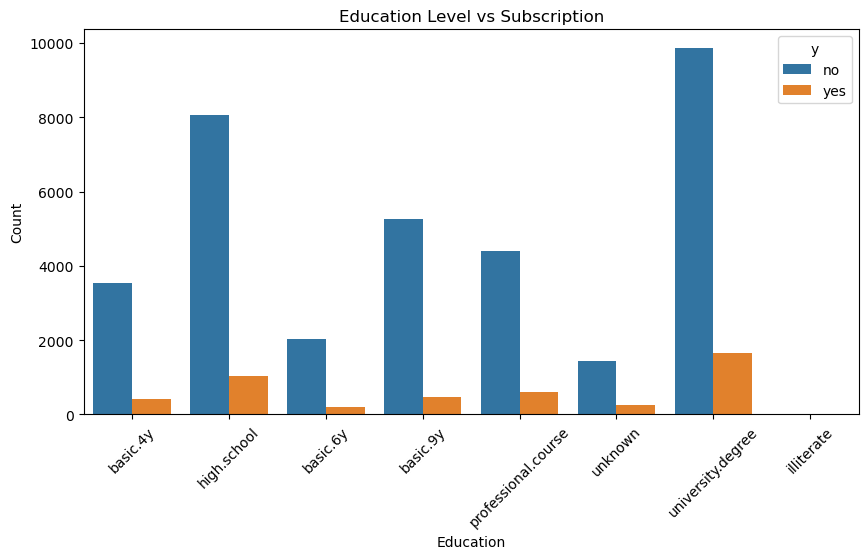

In [42]:
# Count Plot of Education vs Subscription
plt.figure(figsize=(10,5))
sns.countplot(x='education', hue='y', data=df)
plt.title('Education Level vs Subscription')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Shows how likely each education group is to subscribe.

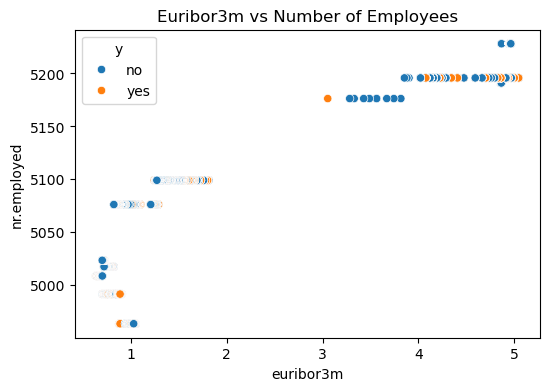

In [44]:
# Scatter Plot of euribor3m vs nr.employed
plt.figure(figsize=(6,4))
sns.scatterplot(x='euribor3m', y='nr.employed', hue='y', data=df)
plt.title('Euribor3m vs Number of Employees')
plt.show()

 Explores the relationship between economic indicators and customer behavior.

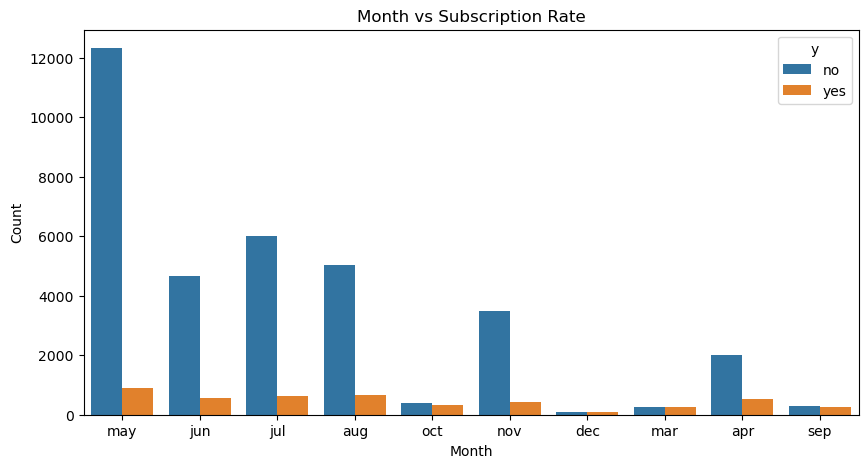

In [46]:
# Bar Plot of Month vs Subscription
plt.figure(figsize=(10,5))
sns.countplot(x='month', hue='y', data=df)
plt.title('Month vs Subscription Rate')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

Analyzes which months had higher campaign success rates.

**Multivariate Analysis (Multiple Features)**

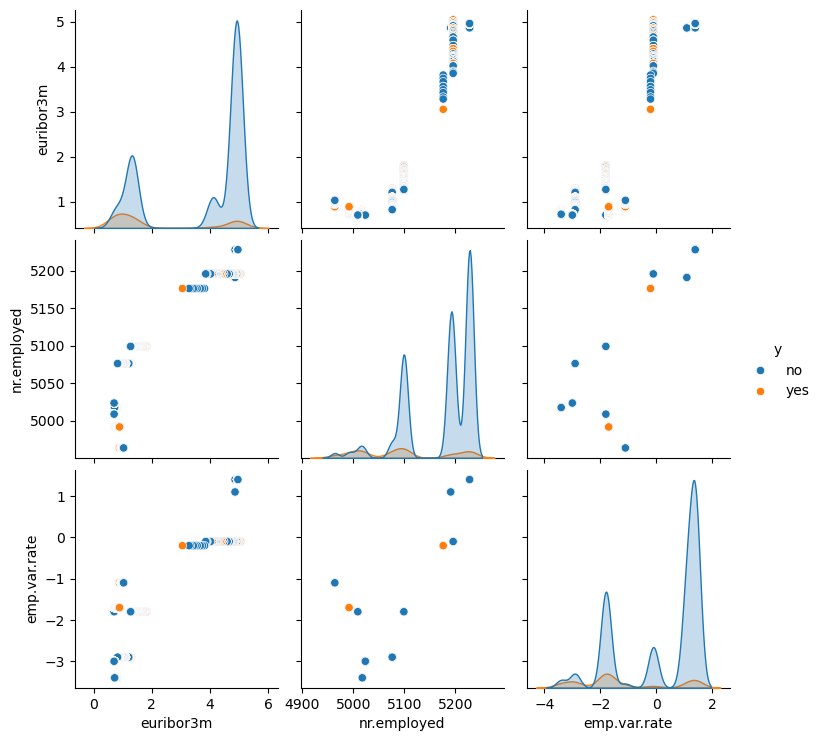

In [49]:
# Pairplot of Top Features
top_features = ['euribor3m', 'nr.employed', 'emp.var.rate', 'contact', 'poutcome', 'y']
sns.pairplot(df[top_features], hue='y')
plt.show()

Shows pairwise scatter plots and distributions. Color-coded by subscription—helps spot clusters and patterns.

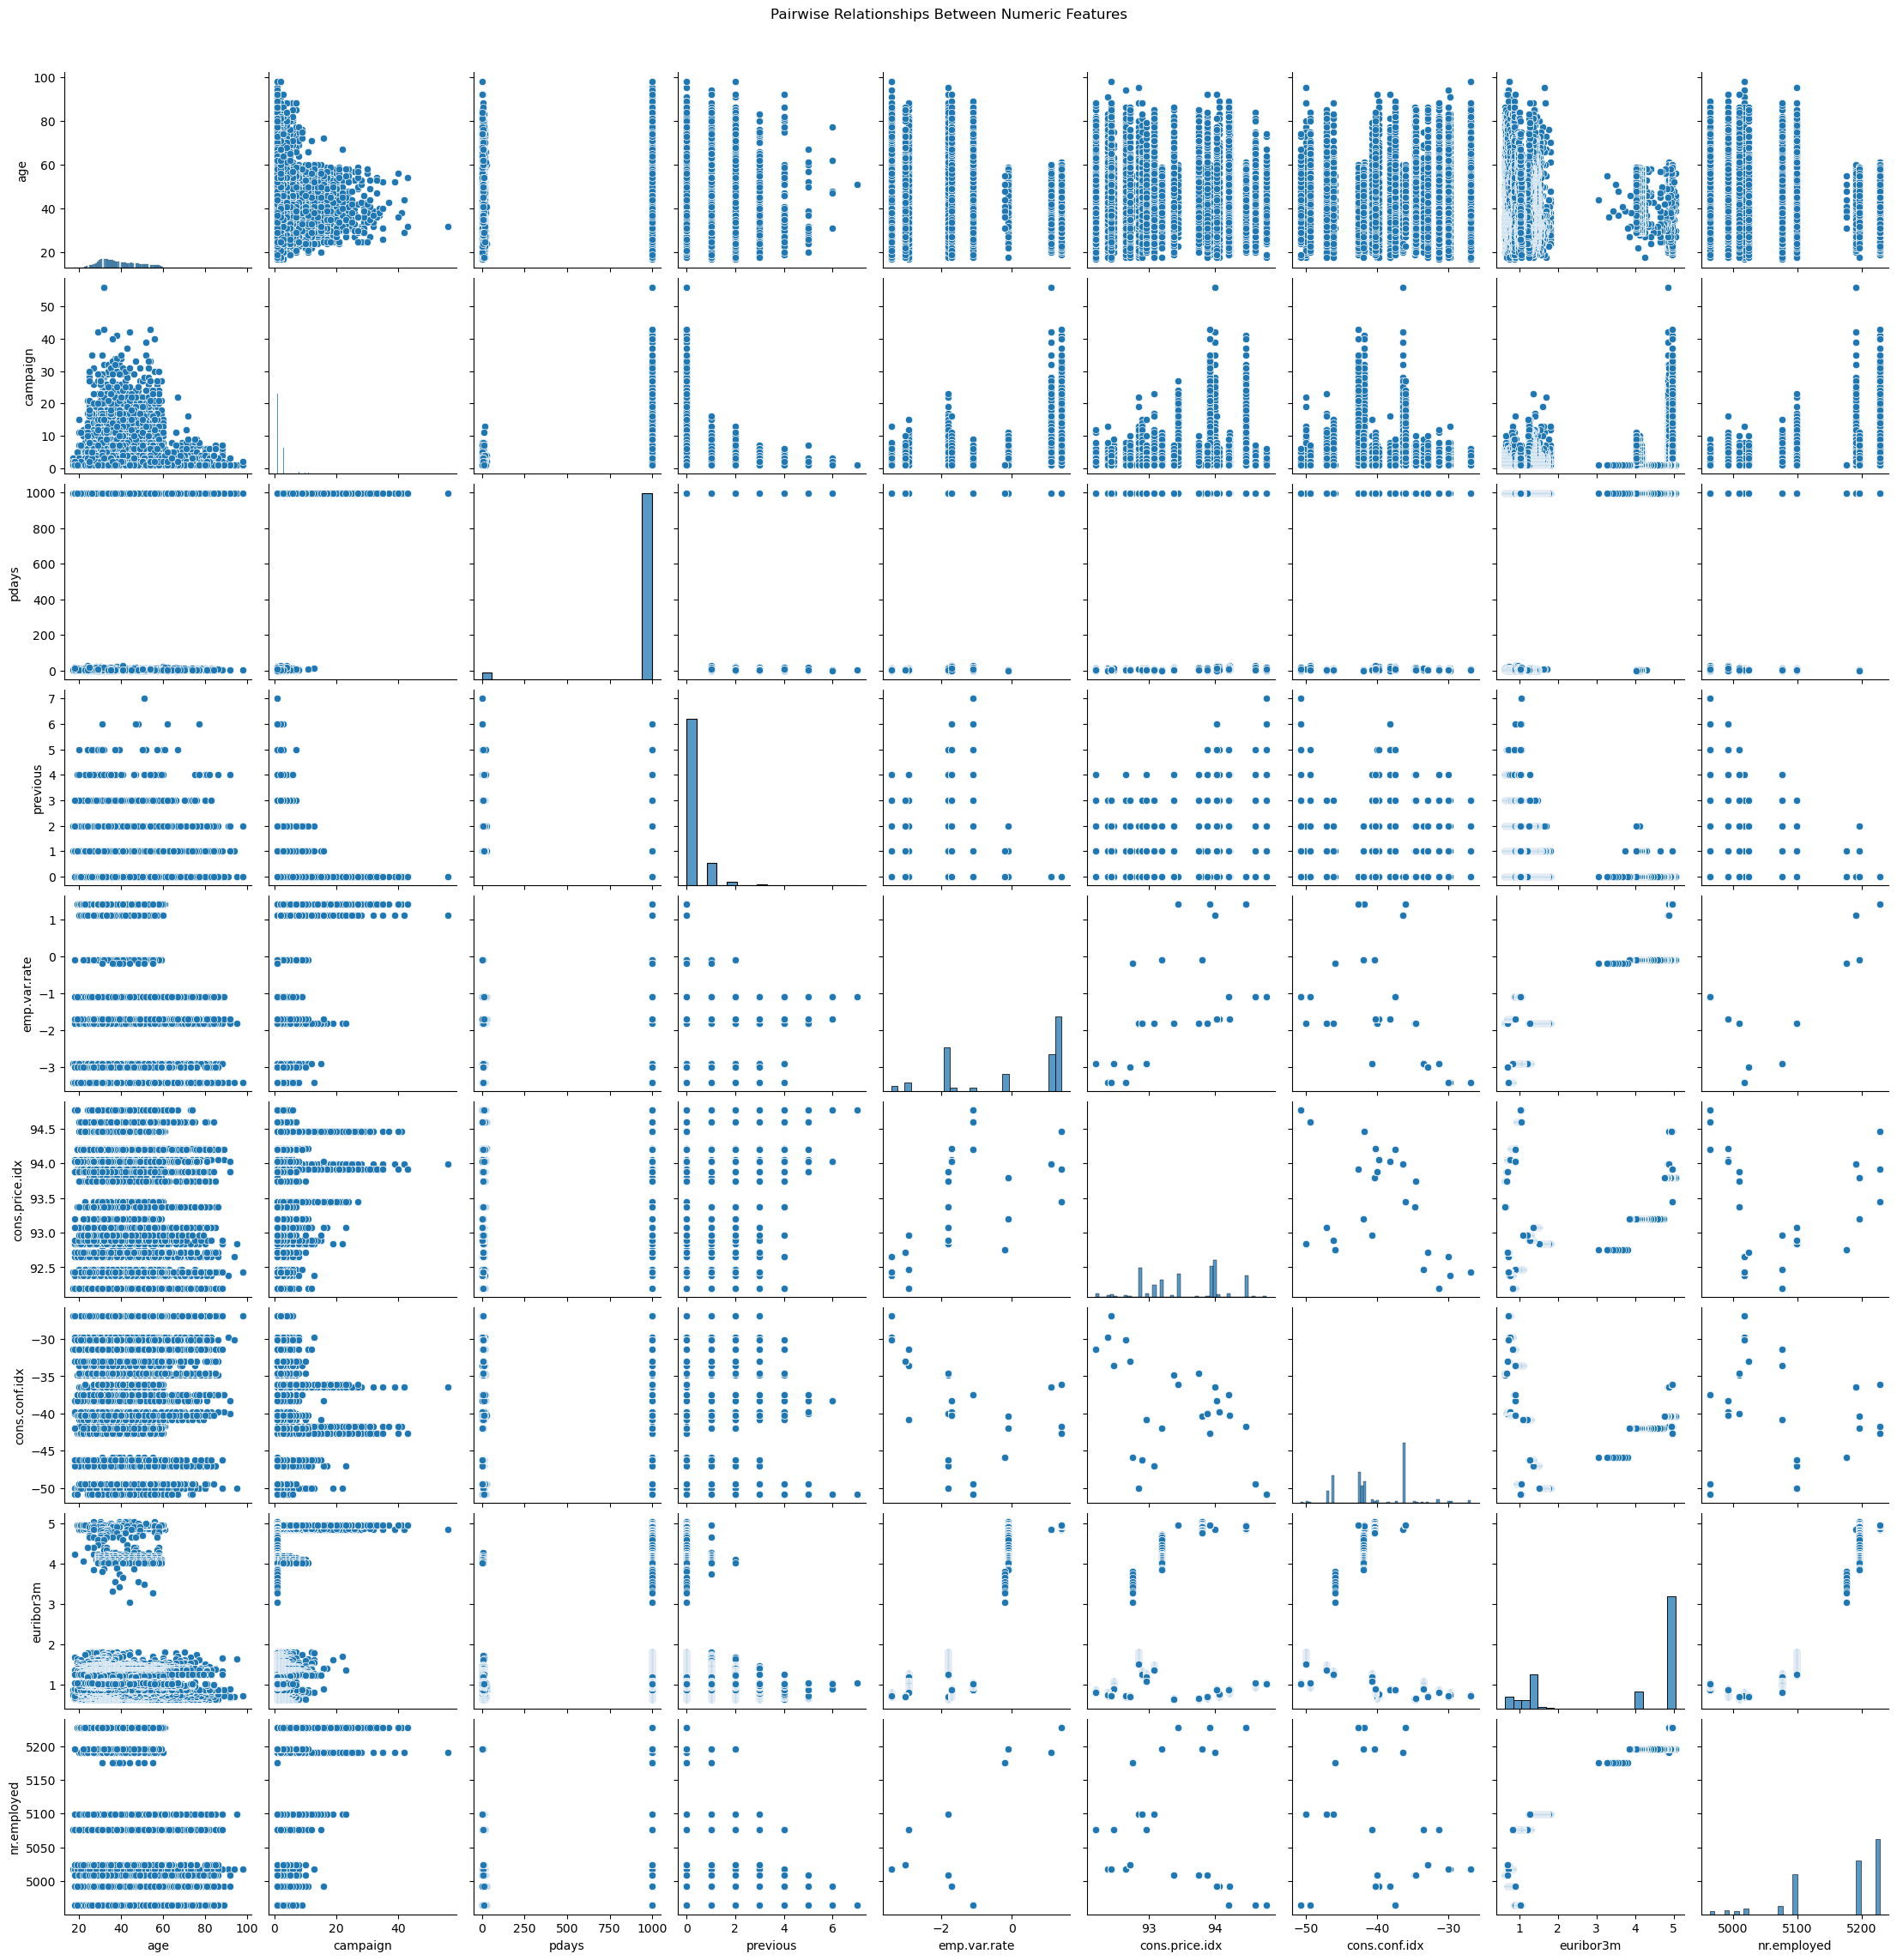

In [51]:
# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Pairplot
sns.pairplot(df[numeric_cols])
plt.suptitle("Pairwise Relationships Between Numeric Features", y=1.02)
plt.show()

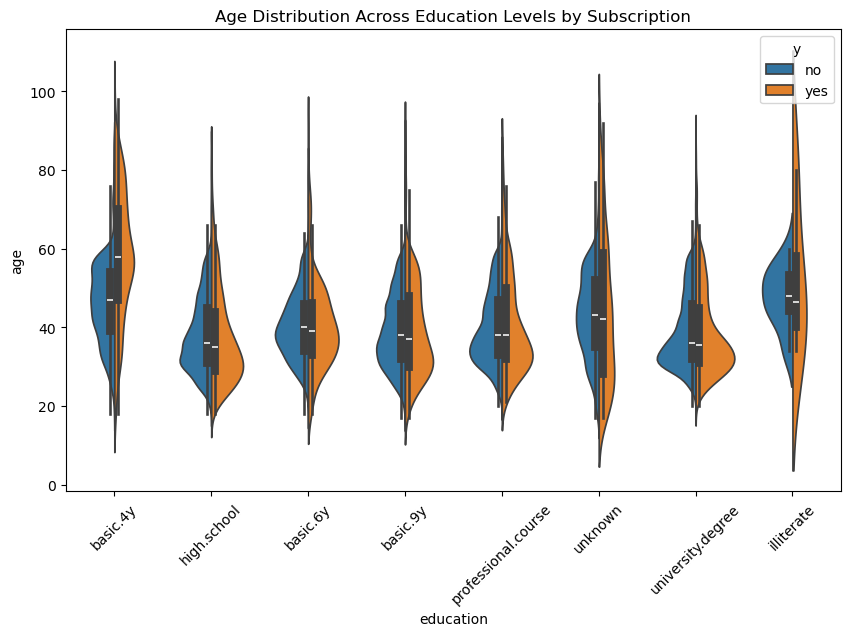

In [52]:
# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='education', y='age', hue='y', data=df, split=True)
plt.title("Age Distribution Across Education Levels by Subscription")
plt.xticks(rotation=45)
plt.show()

Displays the distribution of age across different education levels, comparing those who subscribed (y = yes) and not.

**6.Handle outliers**

In [55]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
skewness = df[numeric_cols].skew()
print("Skewness of numeric features:\n", skewness)

Skewness of numeric features:
 age               0.772868
campaign          4.685223
pdays            -4.788404
previous          3.756805
emp.var.rate     -0.700052
cons.price.idx   -0.230688
cons.conf.idx     0.312625
euribor3m        -0.680533
nr.employed      -1.020569
dtype: float64


In [56]:
# Create a copy
df_capped = df.copy()

# Define the capping function
def cap_outliers_iqr(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))
    return df

# List of numeric columns to cap
numeric_cols = ['age', 'campaign', 'pdays', 'previous', 'nr.employed']

# Apply capping on the copy
for col in numeric_cols:
    df_capped = cap_outliers_iqr(df_capped, col)

Removing the outliers from 'age', 'campaign', 'pdays', 'previous', 'nr.employed' using capping method.

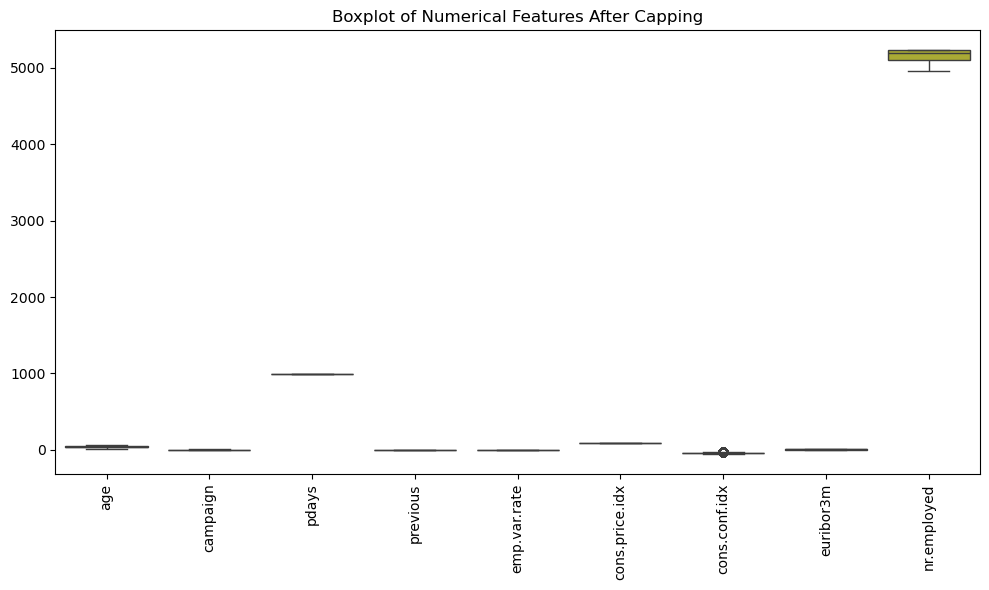

In [58]:
# Visualization of outliers after removing outliers of different features using boxplot
numerical_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Plot boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_capped[numerical_cols])
plt.xticks(rotation=90)
plt.title('Boxplot of Numerical Features After Capping')
plt.tight_layout()
plt.show()

Here we can see there are still some outliers present after removing the outliers in some features.

In [60]:
# Select only numeric columns
numeric_cols = df_capped.select_dtypes(include=['int64', 'float64']).columns
skewness = df_capped[numeric_cols].skew()
print("Skewness of numeric features after applying capping method:\n", skewness)

Skewness of numeric features after applying capping method:
 age               0.555512
campaign          1.165310
pdays             0.000000
previous          0.000000
emp.var.rate     -0.700052
cons.price.idx   -0.230688
cons.conf.idx     0.312625
euribor3m        -0.680533
nr.employed      -1.020569
dtype: float64


After Capping method there is still outliers in Campaign and nr.employed.

In [62]:
# Create a copy of your capped dataset to apply log transformation
df_log_transformed = df_capped.copy()

# Select numerical columns
numerical_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Apply log1p transformation to skewed features
for col in numerical_cols:
    skew_val = df_log_transformed[col].skew()
    if skew_val > 1 or skew_val < -1:
        df_log_transformed[col] = np.log1p(df_log_transformed[col])

# Show skewness after transformation
print("Skewness after log transformation:")
print(df_log_transformed[numerical_cols].skew())

Skewness after log transformation:
age               0.555512
campaign          0.632746
pdays             0.000000
previous          0.000000
emp.var.rate     -0.700052
cons.price.idx   -0.230688
cons.conf.idx     0.312625
euribor3m        -0.680533
nr.employed      -1.039884
dtype: float64


In [63]:
df_log_transformed.shape

(39191, 19)

After log transformation, the skewness is reduced.

In [65]:
# Creating a copy
df_new = df_log_transformed.copy()

# Replace 'unknown' in categorical columns with the mode
for col in df_new.select_dtypes(include='object').columns:
    if 'unknown' in df_new[col].unique():
        mode_value = df_new[col].mode()[0]
        df_new[col] = df_new[col].replace('unknown', mode_value)

print("Replaced 'unknown' values with mode")

Replaced 'unknown' values with mode


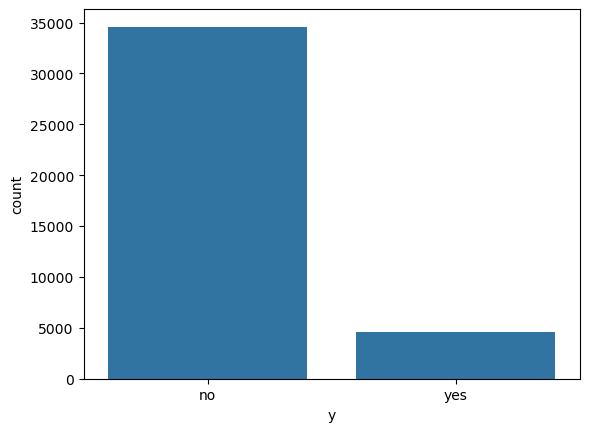

In [71]:
# Checking the data imbalance
sns.countplot(x='y', data= df_new)
plt.show()

**7.Encoding**

In [80]:
# One-hot encoding of categorical features
df_encoded = pd.get_dummies(df_new, drop_first=True)
print("Encoding complete. Shape after encoding:", df_encoded.shape)

Encoding complete. Shape after encoding: (39191, 46)


One-hot Encoding is the most commonly used encoding for categorical data — especially when there’s no natural order in the 
categories (like job, education, marital status, etc.).

In [82]:
df_encoded.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'housing_yes', 'loan_yes', 'contact_telephone', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success', 'y_yes'],
      dtype='object')

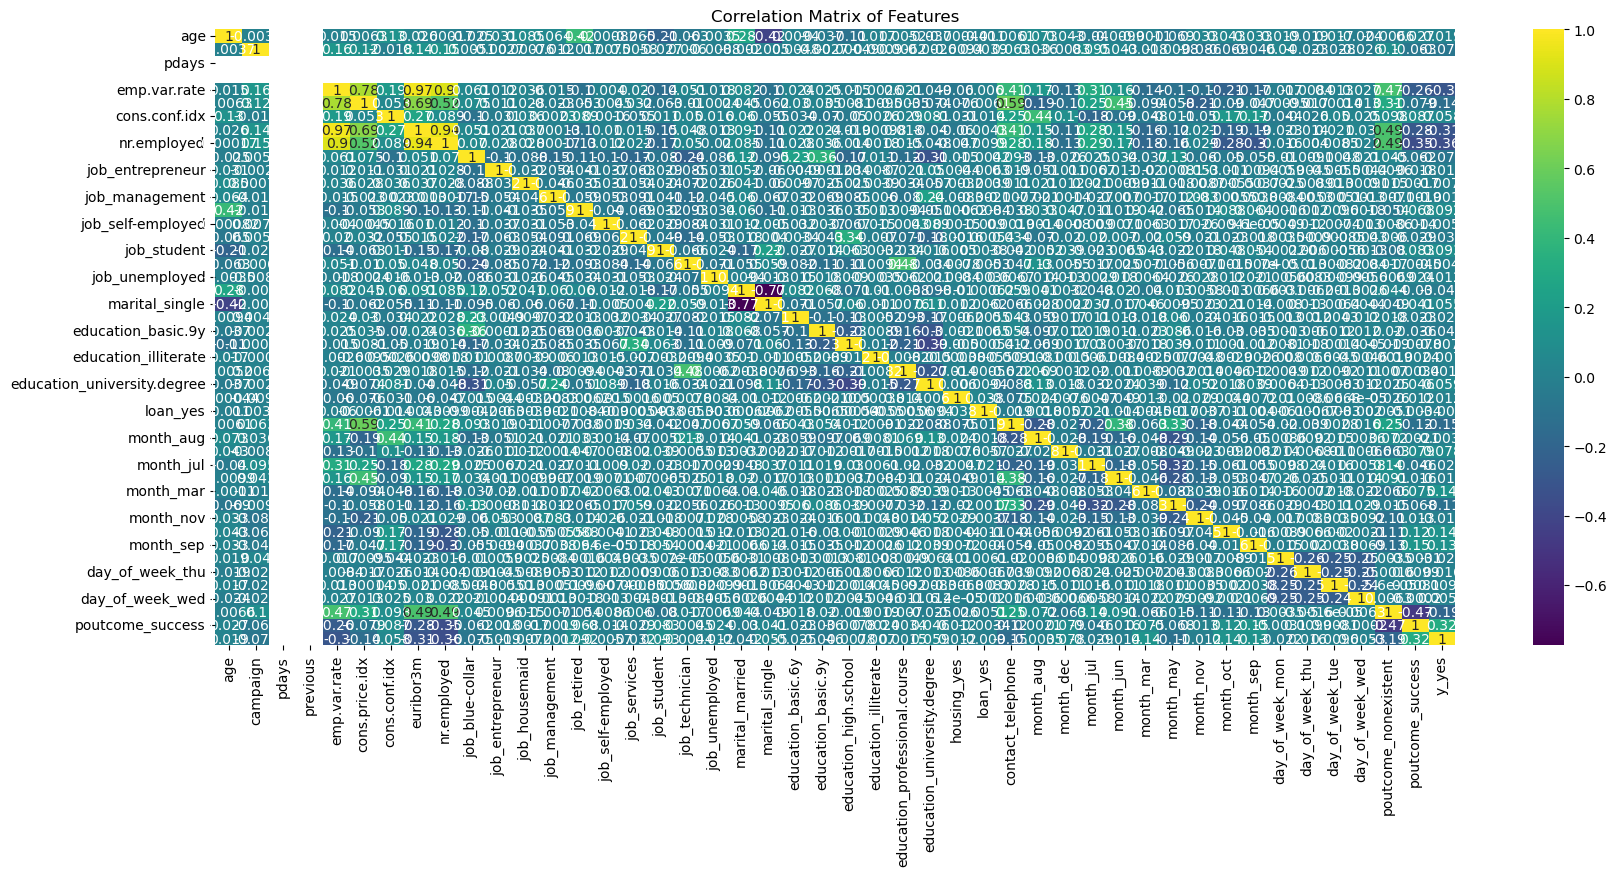

In [83]:
# Correlation Matrix
plt.figure(figsize=(20, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='viridis')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of Features')
plt.show()

Key Insights from Correlation Matrix:

    1.emp.var.rate, euribor3m, and nr.employed are highly correlated with each other.

    2.poutcome_success, contact_cellular, and certain months (like month_mar, month_oct, month_dec) show positive correlation with the target (y_yes).

    3.emp.var.rate, nr.employed, and euribor3m show strong negative correlation with the target.

    4.Most other numeric features have weak correlation with the target.

In [85]:
#correlation with target variable
print(df_encoded.corr()['y_yes'].sort_values(ascending=False))

y_yes                            1.000000
poutcome_success                 0.316272
month_mar                        0.141315
month_oct                        0.136480
month_sep                        0.125738
job_student                      0.093017
job_retired                      0.091584
month_dec                        0.078090
education_university.degree      0.058817
cons.conf.idx                    0.057831
marital_single                   0.055109
age                              0.018788
day_of_week_thu                  0.015950
job_unemployed                   0.012440
housing_yes                      0.011594
day_of_week_tue                  0.009586
education_illiterate             0.006990
day_of_week_wed                  0.005263
education_professional.course    0.001535
job_management                  -0.001216
month_aug                       -0.003529
job_technician                  -0.004363
job_self-employed               -0.005731
job_housemaid                   -0

**8.Feature Selection**

In [88]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Define features (X) and target (y)
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']

# Apply SelectKBest for feature selection (k=15 top features based on ANOVA F-value)
select_k = SelectKBest(score_func=f_classif, k=15)
X_selected = select_k.fit_transform(X, y)

# Get the names and scores of the selected features
selected_features = X.columns[select_k.get_support()]
selected_scores = select_k.scores_[select_k.get_support()]  # Note the underscore after scores

print("Selected Features:", selected_features)
print("Feature Scores based on select_k:", selected_scores)

# Create a DataFrame to display feature names and scores
feature_scores_df = pd.DataFrame({'Feature': selected_features, 'Score': selected_scores})

# Sort by score in descending order
feature_scores_df = feature_scores_df.sort_values(by="Score", ascending=False)

# Print results
print("\nTop Selected Features:\n", feature_scores_df)

Selected Features: Index(['campaign', 'emp.var.rate', 'cons.price.idx', 'euribor3m',
       'nr.employed', 'job_retired', 'job_student', 'contact_telephone',
       'month_dec', 'month_mar', 'month_may', 'month_oct', 'month_sep',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')
Feature Scores based on select_k: [ 236.64085101 3813.17029831  747.40897025 4095.97005845 5650.98420981
  331.4839118   342.03114339  928.86597609  240.44494499  798.54747623
  497.12734416  743.81879532  629.53571431 1511.38416097 4355.6908686 ]

Top Selected Features:
                  Feature        Score
4            nr.employed  5650.984210
14      poutcome_success  4355.690869
3              euribor3m  4095.970058
1           emp.var.rate  3813.170298
13  poutcome_nonexistent  1511.384161
7      contact_telephone   928.865976
9              month_mar   798.547476
2         cons.price.idx   747.408970
11             month_oct   743.818795
12             month_sep   629.535714
10   

In [89]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Separate features and target
X = df_encoded.drop("y_yes", axis=1)
y = df_encoded["y_yes"]

# Apply SelectKBest with ANOVA F-test
select_k = SelectKBest(score_func=f_classif, k=10)
X_selected = select_k.fit_transform(X, y)

# Get selected feature names and scores
selected_features = X.columns[select_k.get_support()]
selected_scores = select_k.scores_[select_k.get_support()]

# Create DataFrame of scores
feature_scores_df = pd.DataFrame({'Feature': selected_features, 'Score': selected_scores})
feature_scores_df = feature_scores_df.sort_values(by="Score", ascending=False)

# Print all columns and selected features
print("All columns:", df_encoded.columns.tolist())
print("\nANOVA selected features:", selected_features.tolist())

# Print results
print("\nTop Selected Features:\n", feature_scores_df)

All columns: ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_married', 'marital_single', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'housing_yes', 'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success', 'y_yes']

ANOVA selected features: ['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed', 'contact_telephone', 'month_mar', 'month_oct', 'month_sep', 'poutcome_nonexistent', 'poutcome_success']

Top Sele

In [90]:
# Drop highly correlated columns
df_encoded = df_encoded.drop(columns=['emp.var.rate', 'euribor3m'])

print("Dropped columns: ['emp.var.rate', 'euribor3m']")
print("Updated shape of df_encoded:", df_encoded.shape)

Dropped columns: ['emp.var.rate', 'euribor3m']
Updated shape of df_encoded: (39191, 44)


In [92]:
df2 = df_encoded[['cons.price.idx', 'nr.employed', 'contact_telephone', 'month_mar', 'month_oct', 'month_sep', 'poutcome_nonexistent', 'poutcome_success', 'y_yes']]
df2

cons.price.idx  nr.employed  contact_telephone  month_mar  month_oct  \
0              93.994     8.554874               True      False      False   
1              93.994     8.554874               True      False      False   
2              93.994     8.554874               True      False      False   
3              93.994     8.554874               True      False      False   
4              93.994     8.554874               True      False      False   
...               ...          ...                ...        ...        ...   
41183          94.767     8.510088              False      False      False   
41184          94.767     8.510088              False      False      False   
41185          94.767     8.510088              False      False      False   
41186          94.767     8.510088              False      False      False   
41187          94.767     8.510088              False      False      False   

       month_sep  poutcome_nonexistent  poutcome_success  y_yes  
0          False                  True             False  False  
1          False                  True             False  False  
2          False                  True             False  False  
3          False                  True             False  False  
4          False                  True             False  False  
...          ...                   ...               ...    ...  
41183      False                  True             False   True  
41184      False                  True             False  False  
41185      False                  True             False  False  
41186      False                  True             False   True  
41187      False                 False             False  False  

[39191 rows x 9 columns]

**9.Splitting The Data**

In [94]:
# Splitting the data
x = df2.drop(columns=['y_yes'])
y = df2['y_yes']                 

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [96]:
X_train

cons.price.idx  nr.employed  contact_telephone  month_mar  month_oct  \
33919          92.893     8.537015              False      False      False   
7870           94.465     8.561994               True      False      False   
8792           94.465     8.561994               True      False      False   
5244           93.994     8.554874               True      False      False   
23197          93.444     8.561994              False      False      False   
...               ...          ...                ...        ...        ...   
6543           93.994     8.554874               True      False      False   
11680          94.465     8.561994               True      False      False   
40151          94.215     8.515712              False      False      False   
891            93.994     8.554874               True      False      False   
16593          93.918     8.561994              False      False      False   

       month_sep  poutcome_nonexistent  poutcome_success  
33919      False                  True             False  
7870       False                  True             False  
8792       False                  True             False  
5244       False                  True             False  
23197      False                  True             False  
...          ...                   ...               ...  
6543       False                  True             False  
11680      False                  True             False  
40151      False                 False             False  
891        False                  True             False  
16593      False                  True             False  

[31352 rows x 8 columns]

In [98]:
X_test

cons.price.idx  nr.employed  contact_telephone  month_mar  month_oct  \
26256          93.200     8.555798              False      False      False   
31894          92.893     8.537015              False      False      False   
15378          93.918     8.561994              False      False      False   
27075          93.200     8.555798              False      False      False   
25394          93.200     8.555798              False      False      False   
...               ...          ...                ...        ...        ...   
444            93.994     8.554874               True      False      False   
1385           93.994     8.554874               True      False      False   
21072          93.444     8.561994              False      False      False   
37705          92.201     8.532515               True      False      False   
19051          93.444     8.561994              False      False      False   

       month_sep  poutcome_nonexistent  poutcome_success  
26256      False                  True             False  
31894      False                 False             False  
15378      False                  True             False  
27075      False                 False             False  
25394      False                  True             False  
...          ...                   ...               ...  
444        False                  True             False  
1385       False                  True             False  
21072      False                  True             False  
37705      False                  True             False  
19051      False                  True             False  

[7839 rows x 8 columns]

In [99]:
y_train

33919    False
7870     False
8792     False
5244     False
23197    False
         ...  
6543     False
11680    False
40151     True
891      False
16593    False
Name: y_yes, Length: 31352, dtype: bool

In [100]:
y_test

26256    False
31894    False
15378     True
27075    False
25394    False
         ...  
444      False
1385     False
21072    False
37705    False
19051    False
Name: y_yes, Length: 7839, dtype: bool

In [101]:
#Applying SMOTE
print("Original Class Distribution:", y_train.value_counts())
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("Resampled Class Distribution:", pd.Series(y_train).value_counts())

Original Class Distribution: y_yes
False    27673
True      3679
Name: count, dtype: int64
Resampled Class Distribution: y_yes
False    27673
True     27673
Name: count, dtype: int64


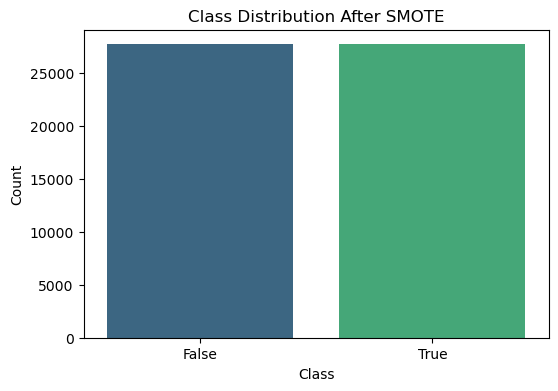

In [102]:
# Count Plot for Resampled Data
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, palette="viridis")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution After SMOTE")
plt.show()

In [105]:
# Scaling using StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [106]:
X_train_scaled

array([[-0.92449658, -0.3997058 , -0.63015638, ..., -0.18048442,
         0.52968345, -0.33691541],
       [ 1.54767759,  1.06873184,  1.58690769, ..., -0.18048442,
         0.52968345, -0.33691541],
       [ 1.54767759,  1.06873184,  1.58690769, ..., -0.18048442,
         0.52968345, -0.33691541],
       ...,
       [ 0.80696892,  0.650158  ,  1.58690769, ..., -0.18048442,
         0.52968345, -0.33691541],
       [-1.65105158, -1.34788201, -0.63015638, ..., -0.18048442,
        -1.88792005, -0.33691541],
       [-0.17592476, -1.45105587, -0.63015638, ..., -0.18048442,
        -1.88792005,  2.9681041 ]])

In [108]:
X_train_scaled.shape

(55346, 8)

In [109]:
X_train.shape

(55346, 8)

In [110]:
X_test

cons.price.idx  nr.employed  contact_telephone  month_mar  month_oct  \
26256          93.200     8.555798              False      False      False   
31894          92.893     8.537015              False      False      False   
15378          93.918     8.561994              False      False      False   
27075          93.200     8.555798              False      False      False   
25394          93.200     8.555798              False      False      False   
...               ...          ...                ...        ...        ...   
444            93.994     8.554874               True      False      False   
1385           93.994     8.554874               True      False      False   
21072          93.444     8.561994              False      False      False   
37705          92.201     8.532515               True      False      False   
19051          93.444     8.561994              False      False      False   

       month_sep  poutcome_nonexistent  poutcome_success  
26256      False                  True             False  
31894      False                 False             False  
15378      False                  True             False  
27075      False                 False             False  
25394      False                  True             False  
...          ...                   ...               ...  
444        False                  True             False  
1385       False                  True             False  
21072      False                  True             False  
37705      False                  True             False  
19051      False                  True             False  

[7839 rows x 8 columns]

In [112]:
y_train

0        False
1        False
2        False
3        False
4        False
         ...  
55341     True
55342     True
55343     True
55344     True
55345     True
Name: y_yes, Length: 55346, dtype: bool

In [114]:
y_train_df = pd.DataFrame(y_train) #converting to data frame from series
scaler = StandardScaler()
scaler.fit(y_train_df)
y_train_scaled = scaler.transform(y_train_df)

In [115]:
y_train_scaled

array([[-1.],
       [-1.],
       [-1.],
       ...,
       [ 1.],
       [ 1.],
       [ 1.]])

In [116]:
y_test

26256    False
31894    False
15378     True
27075    False
25394    False
         ...  
444      False
1385     False
21072    False
37705    False
19051    False
Name: y_yes, Length: 7839, dtype: bool

In this project, classification models are used to predict whether the customers will subscribe to a term deposit based on various features in the datasets.

*   Logistic Regression
*   Decision Tree Classifier 
*   Random Forest Classifier
*   Gradient Boosting Classifier
*   Support Vector Classifier

**MODEL TRAINING AND EVALUATION**

In [156]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Logistic Regression Results:
Accuracy: 0.724709784411277
Precision: 0.24776240846216435
Recall: 0.6633986928104575
F1 Score: 0.36078199052132703


In [158]:
# Decision Tree Classifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Decision Tree Results:
Accuracy: 0.8419441255262151
Precision: 0.3810229799851742
Recall: 0.5599128540305011
F1 Score: 0.4534627260696956


In [160]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Random Forest Results:
Accuracy: 0.8418165582344687
Precision: 0.38074074074074077
Recall: 0.5599128540305011
F1 Score: 0.4532627865961199


In [162]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

print("Gradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Gradient Boosting Results:
Accuracy: 0.840285750733512
Precision: 0.37985611510791367
Recall: 0.5751633986928104
F1 Score: 0.45753899480069327


In [164]:
# Support Vector Classifier
svc_model = SVC(probability=True)
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

print("SVC Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

SVC Results:
Accuracy: 0.6636050516647531
Precision: 0.201666088163832
Recall: 0.6328976034858388
F1 Score: 0.30586996578046854
